# Brain Stroke Analysis and Prediction

Data: 
- gender, age
- bmi, hypertension, heartdesease, avg_glucose_level, smoking_status
- ever_married, work_type, Residence_type
- stroke (0 or 1)

TODO:
1. 对每个性状与是否中风的影响画图 - 条形图、饼图等
2. 显著性分析 - 某个性状对中风是否有影响
3. correlation map
4. 分类模型训练与准确度对比 - Naive Bayes (Bernoulli & Gaussian), Logistic Regression, K-Nearest Neighbor, Random Forest, Support Vector Machine)

Report: （找双列的报告模板）
1. Background
2. Dataset Discription
3. Data Analysis and Visualization
4. Model Training and Evaluation （每个模型放公式）
5. Conclusion

## Data Analysis

### Basic Exploration

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from statsmodels.stats.proportion import proportions_ztest

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
df[categorical_columns].describe().T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


#### Count the values of categorical columns and including binary numerical columns.

binary columns (only includes 0 and 1, or two types):
- gender (female, male)
- hypertension (0, 1)
- heart_disease (0, 1)
- ever_married (Yes, No)
- Residence_type (Urban, Rural)
- stroke (0, 1)

In [66]:
df['stroke'].value_counts()

stroke
0    4860
1     249
Name: count, dtype: int64

In [59]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

In [64]:
df['hypertension'].value_counts()

hypertension
0    4611
1     498
Name: count, dtype: int64

In [65]:
df['heart_disease'].value_counts()

heart_disease
0    4833
1     276
Name: count, dtype: int64

In [63]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: count, dtype: int64

In [60]:
df['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [61]:
df['work_type'].value_counts()

work_type
Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [62]:
df['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2513
Name: count, dtype: int64

### Correlation map

In [67]:
stroke_column = df['stroke']
df_encoded = pd.get_dummies(df.drop(columns=['stroke', 'id']), drop_first=True) # one hot encoding
df_encoded.insert(0, 'stroke', stroke_column)
correlation_matrix = df_encoded.corr()

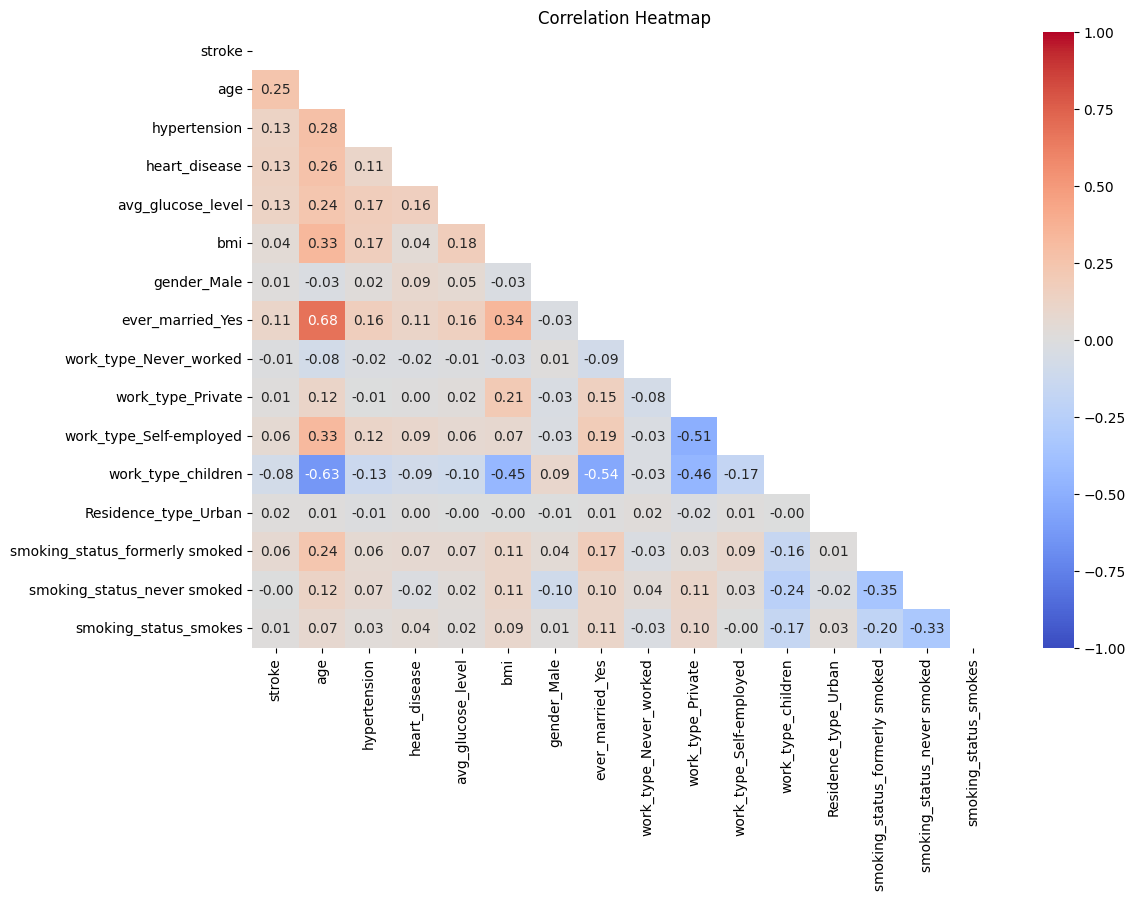

In [56]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool)) # mask the diagonal

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, mask=mask) 
plt.title('Correlation Heatmap')
plt.show()

The first column of the correlation heatmap is the correlation of each feature with stroke.

In [57]:
correlation_with_stroke = correlation_matrix['stroke'].drop('stroke')
sorted_correlation = correlation_with_stroke.sort_values(ascending=False)
print("Correlation with stroke:")
print(sorted_correlation)

Correlation with stroke:
age                               0.245239
heart_disease                     0.134905
avg_glucose_level                 0.131991
hypertension                      0.127891
ever_married_Yes                  0.108299
smoking_status_formerly smoked    0.064683
work_type_Self-employed           0.062150
bmi                               0.042341
Residence_type_Urban              0.015415
work_type_Private                 0.011927
gender_Male                       0.009081
smoking_status_smokes             0.008920
smoking_status_never smoked      -0.004163
work_type_Never_worked           -0.014885
work_type_children               -0.083888
Name: stroke, dtype: float64


C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\3028704252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, orient='h', palette=colors)


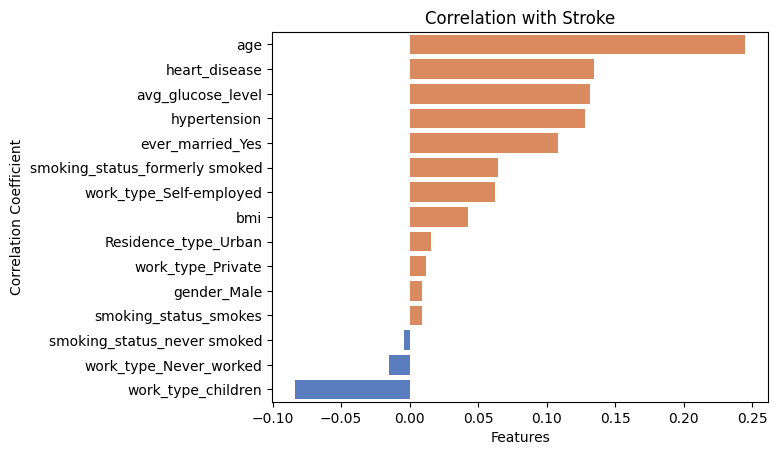

In [141]:
colors = [sns.color_palette("muted")[1] if value > 0 else sns.color_palette("muted")[0] for value in sorted_correlation]

sns.barplot(x=sorted_correlation.values, y=sorted_correlation.index, orient='h', palette=colors)
plt.title('Correlation with Stroke')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

### Analysis on Stroke Patients' Gender

In [34]:
df = df[df["gender"] != "Other"]

In [41]:
df_gender = df.groupby(["gender", "stroke"]).size().unstack(fill_value=0)
df_gender.columns = ["No Stroke", "Stroke"]
df_gender["Stroke Ratio"] = df_gender["Stroke"] / (df_gender["Stroke"] + df_gender["No Stroke"])
df_gender

,No Stroke,Stroke,Stroke Ratio
gender,,,
Female,2853,141,0.047094
Male,2007,108,0.051064


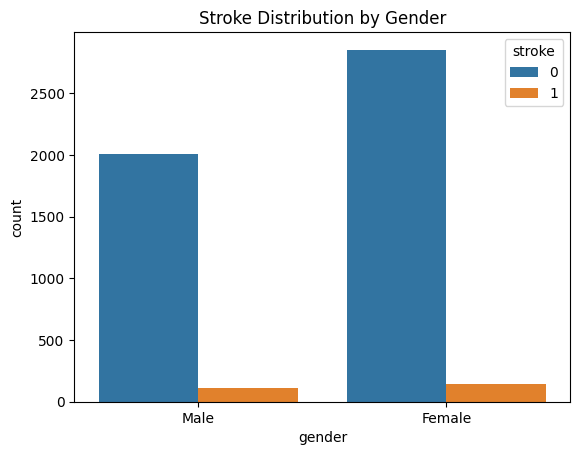

In [40]:
sns.countplot(x='gender', hue='stroke', data=df)
# plt.yscale('log')
plt.title('Stroke Distribution by Gender')
plt.show()

Chi-squared test: \
（性别和中风这两个变量是类别变量（categorical variables），因此更适合使用 卡方检验（Chi-squared test） 来进行显著性分析。）
- chi2_stat: 卡方统计量，用于衡量实际值和预期值之间的差异。
- p_value: 显著性水平，如果 p_value < 0.05，说明性别和中风之间有显著关系。
- dof: 自由度，等于 (行数 - 1) * (列数 - 1)。
- expected: 根据零假设计算的预期频数。

In [44]:
contingency_table = pd.crosstab(df['gender'], df['stroke'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

if p_value < 0.05:
    print("There is a significant relationship between gender and stroke.")
else:
    print("There is no significant relationship between gender and stroke.")

Chi2 Statistic: 0.340002536046177
P-Value: 0.5598277580669416
Degrees of Freedom: 1
Expected Frequencies: 
[[2848.07985907  145.92014093]
 [2011.92014093  103.07985907]]
There is no significant relationship between gender and stroke.


Proportion Test:\
用于比较两个群体中某一事件发生的比例是否相等，可以用Z-Test来进行比例检验。
- count: 每个性别中风的数量。
- nobs: 每个性别的总人数。
- proportions_ztest: 进行比例检验，返回 Z 统计量和 p 值。
- 如果 p-value < 0.05，表示性别和中风的比例差异显著；否则，表示差异不显著。
- 如果 Z-statistic 很大（比如绝对值大于 1.96），说明两组数据差异显著，拒绝零假设。
- 如果 Z-statistic 的值接近零，表示没有显著差异，支持零假设。

In [48]:
# ! pip install statsmodels

In [47]:
from statsmodels.stats.proportion import proportions_ztest
count = df.groupby('gender')['stroke'].sum()
nobs = df['gender'].value_counts()
stat, pval = proportions_ztest(count, nobs)
print(f"Z-statistic: {stat}, p-value: {pval}")

if pval < 0.05:
    print("There is a significant difference in stroke rates between genders.")
else:
    print("There is no significant difference in stroke rates between genders.")

Z-statistic: -0.6490565013589283, p-value: 0.5163018564037076
There is no significant difference in stroke rates between genders.


Conclusion: There is no significant difference in stroke rates between male and female.

### Analysis on Stroke Patients' Age

In [69]:
stroke_group = df[df['stroke'] == 1]['age']
non_stroke_group = df[df['stroke'] == 0]['age']

stroke_stats = stroke_group.describe().rename("Stroke")
non_stroke_stats = non_stroke_group.describe().rename("Non-Stroke")

age_stats = pd.concat([stroke_stats, non_stroke_stats], axis=1)
print(age_stats)

           Stroke   Non-Stroke
count  249.000000  4860.000000
mean    67.728193    41.974831
std     12.727419    22.293056
min      1.320000     0.080000
25%     59.000000    24.000000
50%     71.000000    43.000000
75%     78.000000    59.000000
max     82.000000    82.000000


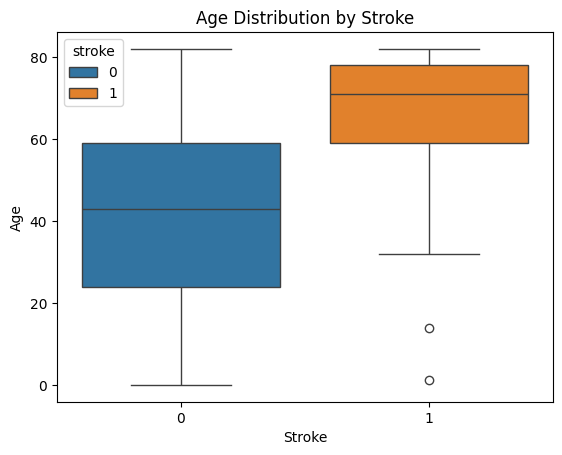

In [143]:
sns.boxplot(x='stroke', y='age', data=df, hue="stroke")
plt.title('Age Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

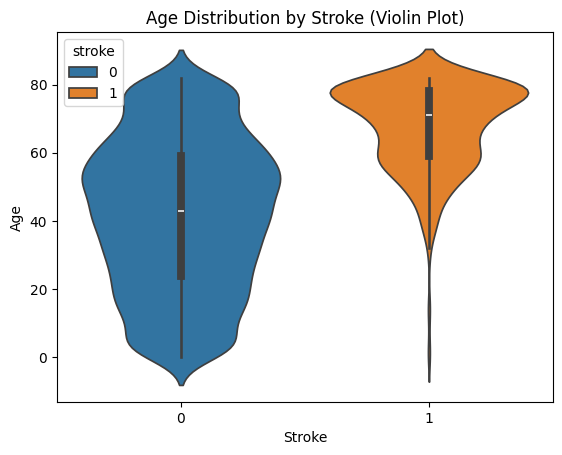

In [94]:
sns.violinplot(x='stroke', y='age', data=df, hue='stroke')
plt.title('Age Distribution by Stroke (Violin Plot)')
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.show()

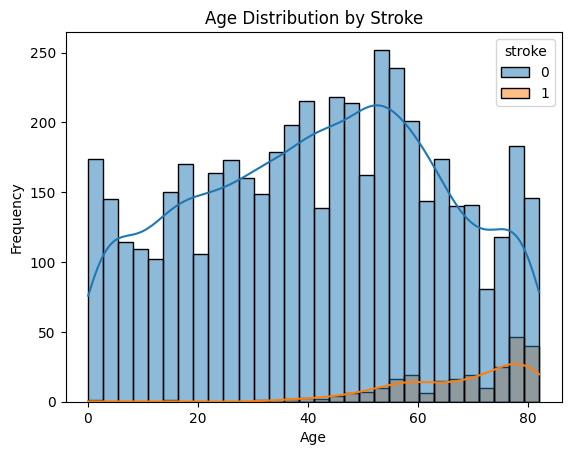

In [72]:
sns.histplot(data=df, x='age', hue='stroke', kde=True, bins=30)
plt.title('Age Distribution by Stroke')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

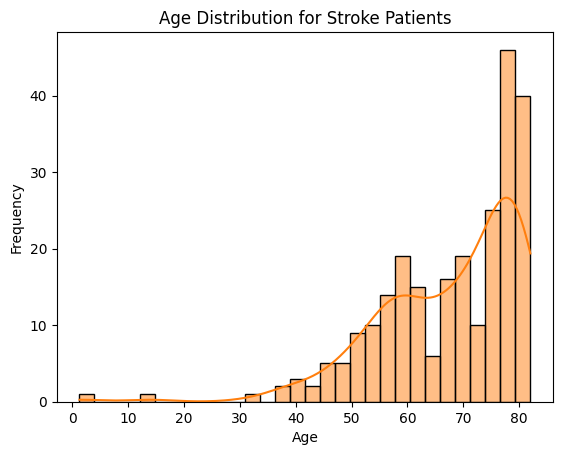

In [80]:
stroke_only = df[df['stroke'] == 1]
color = sns.color_palette()[1]

sns.histplot(data=stroke_only, x='age', kde=True, bins=30, color = color) 
plt.title('Age Distribution for Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

T-test

In [75]:
from scipy.stats import ttest_ind
t_stat, p_val = ttest_ind(stroke_group, non_stroke_group)
print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in age between the stroke and non-stroke groups.")
else:
    print("There is no significant difference in age between the stroke and non-stroke groups.")

T-statistic: 18.07760628336985, p-value: 7.435468822639662e-71
There is a significant difference in age between the stroke and non-stroke groups.


Analysis on age and gender

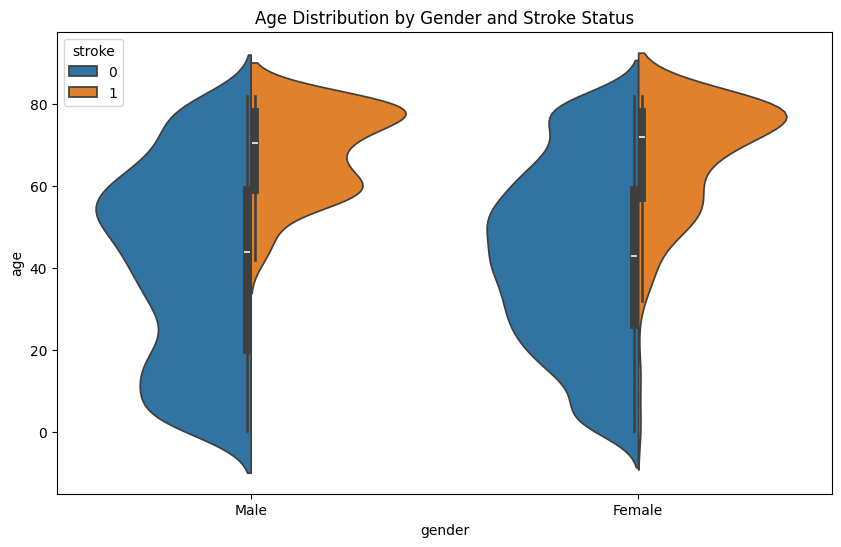

In [76]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="gender", y="age", hue="stroke", data=df, split=True)
plt.title("Age Distribution by Gender and Stroke Status")
plt.show()

Conclusion:
- There is significant relationship between age and gender.
- The average age of stroke patients is approximately 67.7 years, which is significantly higher than the average age 41.97 of non-stroke individuals.
- The majority of stroke cases occur in older age groups, particularly individuals aged 50 and above.
- There is a notable increase in stroke frequency with age, which peaks around the late 70s to early 80s.
- Younger age groups (below 40) show minimal stroke cases.

### Analysis on Relationship between Stroke and Smoking Status

In [96]:
df_smoke = df.groupby(["smoking_status", "stroke"]).size().unstack(fill_value=0)
df_smoke.columns = ["No Stroke", "Stroke"]
df_smoke["Stroke Ratio"] = df_smoke["Stroke"] / (df_smoke["Stroke"] + df_smoke["No Stroke"])
df_smoke

,No Stroke,Stroke,Stroke Ratio
smoking_status,,,
Unknown,1497,47,0.030440
formerly smoked,814,70,0.079186
never smoked,1802,90,0.047569
smokes,747,42,0.053232


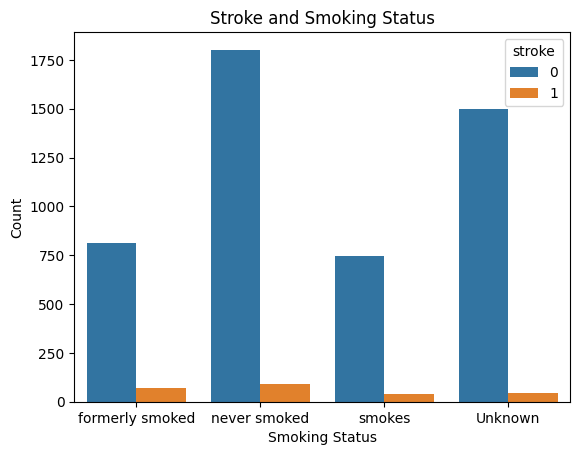

In [99]:
sns.countplot(x='smoking_status', hue='stroke', data=df)
plt.title('Stroke and Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

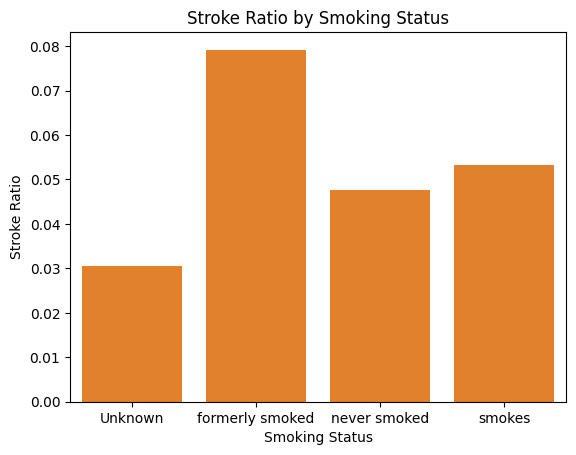

In [106]:
sns.barplot(x=df_smoke.index, y=df_smoke['Stroke Ratio'], color=sns.color_palette()[1])
plt.title('Stroke Ratio by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Ratio')
plt.show()

In [102]:
cross_tab = pd.crosstab(df['smoking_status'], df['stroke'])
print(cross_tab)

chi2, p, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

# 根据p值得出结论
if p < 0.05:
    print("There is a significant relationship between smoking status and stroke.")
else:
    print("There is no significant relationship between smoking status and stroke.")

stroke              0   1
smoking_status           
Unknown          1497  47
formerly smoked   814  70
never smoked     1802  90
smokes            747  42
Chi2: 29.22572707549827, p-value: 2.0077041756108317e-06
There is a significant relationship between smoking status and stroke.


这里出现了奇怪的现象：为什么“以前吸烟”比“吸烟”中风率更高呢？我又查看了correlation map，发现是因为“以前吸烟”和年龄的相关度更高，也就是“以前吸烟”的人大多年龄较大，而“吸烟”的人年龄较小。因此，看似是吸烟状态与中风有关，实际上是受了年龄的影响。这就是两个feature相关但没有直接因果关系，而是受了第三个变量的影响。

### Analysis on BMI and Stroke

In [185]:
stroke_group_bmi = df[df['stroke'] == 1]['bmi']
non_stroke_group_bmi = df[df['stroke'] == 0]['bmi']

stroke_stats_bmi = stroke_group_bmi.describe().rename("Stroke")
non_stroke_stats_bmi = non_stroke_group_bmi.describe().rename("Non-Stroke")

bmi_stats = pd.concat([stroke_stats_bmi, non_stroke_stats_bmi], axis=1)
print(bmi_stats)

           Stroke   Non-Stroke
count  209.000000  4699.000000
mean    30.471292    28.824431
std      6.329452     7.908573
min     16.900000    10.300000
25%     26.400000    23.400000
50%     29.700000    28.000000
75%     33.700000    33.100000
max     56.600000    97.600000


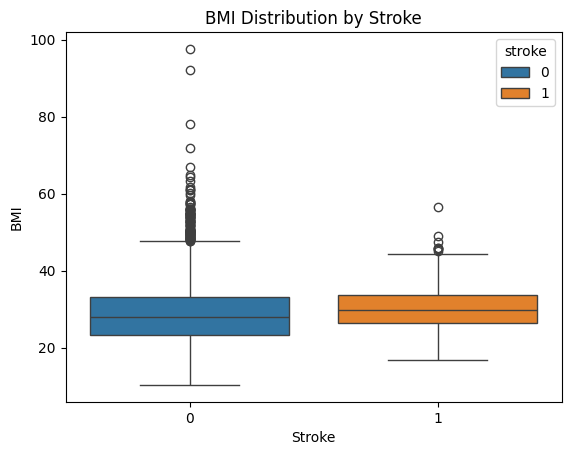

In [142]:
sns.boxplot(x='stroke', y='bmi', data=df, hue="stroke")
plt.title('BMI Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

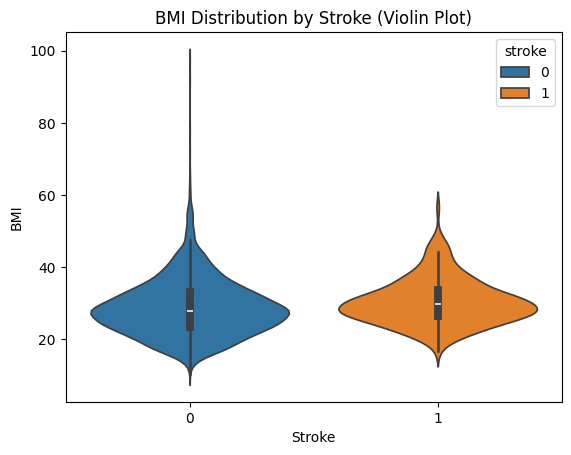

In [110]:
sns.violinplot(x='stroke', y='bmi', data=df, hue="stroke")
plt.title('BMI Distribution by Stroke (Violin Plot)')
plt.xlabel('Stroke')
plt.ylabel('BMI')
plt.show()

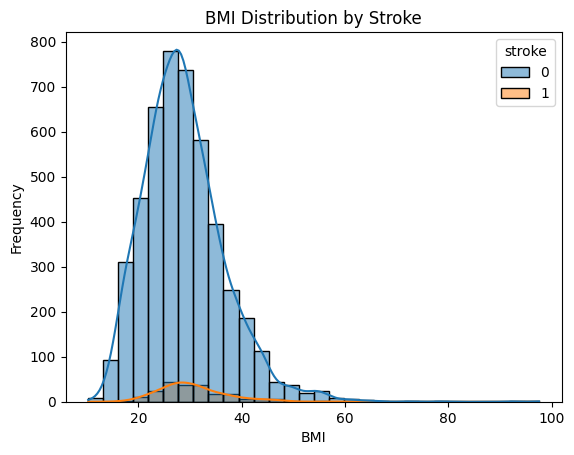

In [112]:
sns.histplot(data=df, x='bmi', hue='stroke', kde=True, bins=30)
plt.title('BMI Distribution by Stroke')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\754259379.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


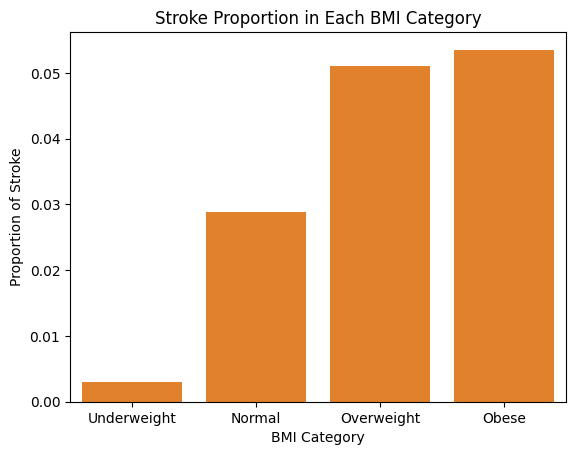

In [120]:
bmi_bins = [0, 18.5, 24.9, 29.9, 40]  # BMI<18.5, 18.5-24.9, 25-29.9, 30-40
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
bmi_category = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_group = pd.DataFrame({
    'stroke': df['stroke'],
    'bmi_category': bmi_category
}).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
bmi_group['stroke_ratio'] = bmi_group[1]

sns.barplot(x=bmi_group.index, y=bmi_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Proportion of Stroke')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\4063536753.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


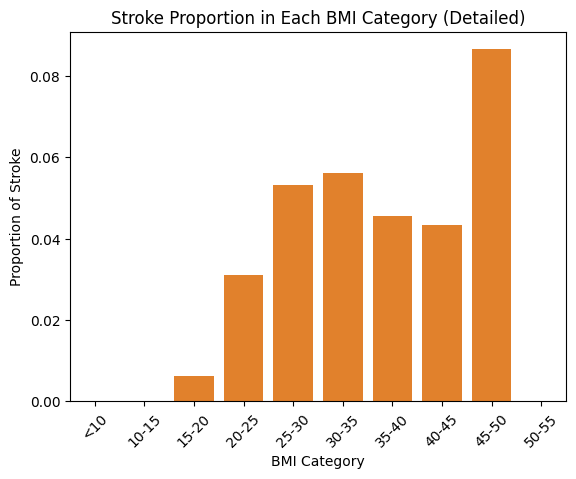

In [123]:
bmi_bins = [0, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
bmi_labels = ['<10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55']
bmi_category = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

bmi_group = pd.DataFrame({
    'stroke': df['stroke'],
    'bmi_category': bmi_category
}).groupby('bmi_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
bmi_group['stroke_ratio'] = bmi_group[1]

sns.barplot(x=bmi_group.index, y=bmi_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each BMI Category (Detailed)')
plt.xlabel('BMI Category')
plt.ylabel('Proportion of Stroke')
plt.xticks(rotation=45)
plt.show()

In [111]:
t_stat, p_val = ttest_ind(stroke_group_bmi.dropna(), non_stroke_group_bmi.dropna())
print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in BMI between the stroke and non-stroke groups.")
else:
    print("There is no significant difference in BMI between the stroke and non-stroke groups.")

T-statistic: 2.968365485973203, p-value: 0.003008355955526417
There is a significant difference in BMI between the stroke and non-stroke groups.


Conclusion:
- There is a significant difference in BMI between the stroke and non-stroke groups.
- The average BMI for the stroke group is 30.47, while for the non-stroke group, it is 28.82.
- Individuals with a higher BMI (such as in the overweight and obese categories) are more likely to experience a stroke, while those with a normal or lower BMI are less likely.

### Analysis on relationship between stroke and hypertension.

In [148]:
stroke_hypertension = df.groupby(['hypertension', 'stroke']).size().unstack().fillna(0)
stroke_hypertension['stroke_ratio'] = stroke_hypertension[1] / (stroke_hypertension[0] + stroke_hypertension[1])
print(stroke_hypertension)

stroke           0    1  stroke_ratio
hypertension                         
0             4428  183      0.039688
1              432   66      0.132530


Chi-squared test

In [152]:
contingency_table = pd.crosstab(df['stroke'], df['hypertension'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between stroke and hypertension.")
else:
    print("There is no significant relationship between stroke and hypertension.")

Chi2 Statistic: 81.57314462043591
P-value: 1.688936253410575e-19
There is a significant relationship between stroke and hypertension.


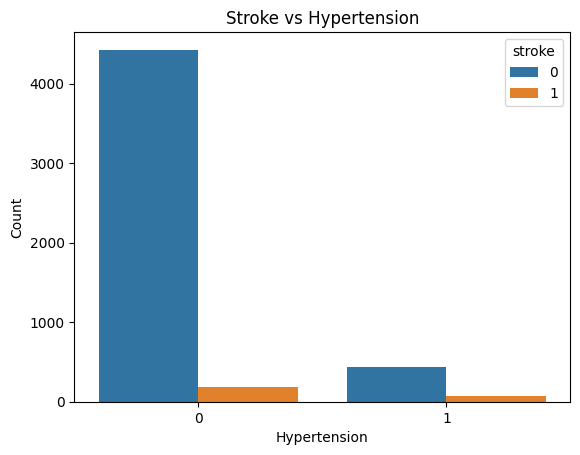

In [153]:
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Stroke vs Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

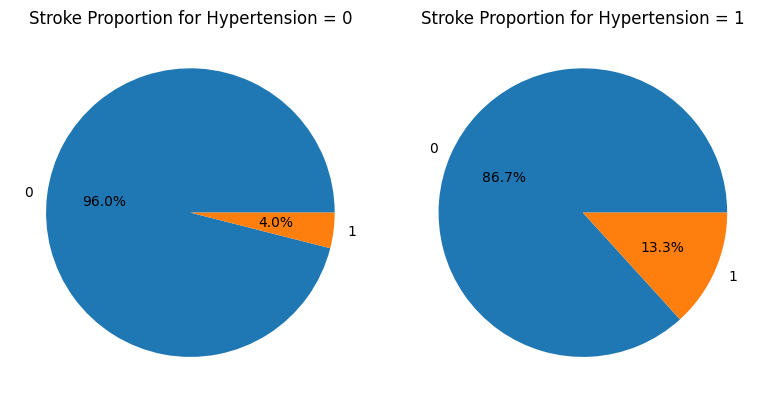

In [160]:
colors = sns.color_palette()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for hypertension_status in df['hypertension'].unique():
    stroke_count = df[df['hypertension'] == hypertension_status]['stroke'].value_counts()
    axes[hypertension_status].pie(stroke_count, labels=stroke_count.index, autopct='%1.1f%%', colors=colors)
    axes[hypertension_status].set_title(f"Stroke Proportion for Hypertension = {hypertension_status}")

plt.tight_layout()
plt.show()

中风（stroke）和高血压（hypertension）之间的显著关系，可能并不是直接的因果关系，而是可能与 年龄（age） 等其他变量有关。因此，我们需要考虑一下 混淆效应，即 年龄 可能是影响中风和高血压关系的一个潜在因素。
1. 分层分析（Stratified Analysis）:
可以将数据按照 年龄段（age） 进行分层，并分别计算每个年龄段中高血压和中风的关系。
2. 多变量回归分析（Multivariable Regression Analysis）:
可以使用 逻辑回归（Logistic Regression） 来建模，并分析每个变量的系数。通过回归结果的 p值 和 系数，可以判断 高血压（hypertension） 在控制 年龄（age） 后对 中风（stroke） 的影响是否仍然显著。
3. 相关性分析（Correlation Analysis）:
还可以使用 皮尔逊相关系数 或 斯皮尔曼等级相关系数 来计算 高血压、年龄和中风 之间的相关性。

In [197]:
results = pd.DataFrame(columns=["Age Group", "Chi2 Statistic", "P-value", "Conclusion"])

age_bins = [0, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

for age in age_labels:
    subgroup = df[age_group == age]
    contingency_table = pd.crosstab(subgroup['hypertension'], subgroup['stroke'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

    conclusion = "Significant" if p_val < 0.05 else "Not significant"
    
    current_result = pd.DataFrame([{
        "Age Group": age,
        "Chi2 Statistic": chi2_stat,
        "P-value": p_val,
        "Conclusion": conclusion
    }])

    results = pd.concat([results, current_result], ignore_index=True)

results

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\1819144783.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


,Age Group,Chi2 Statistic,P-value,Conclusion
0,<30,0.000000,1.000000,Not significant
1,30-40,0.302517,0.582309,Not significant
2,40-50,0.126265,0.722336,Not significant
3,50-60,4.295561,0.038212,Significant
4,60-70,1.680517,0.194856,Not significant
5,70-80,1.651540,0.198749,Not significant
6,80-90,0.494718,0.481830,Not significant


50-60岁之间高血压和中风显著相关，其他年龄阶段不显著。

In [162]:
correlation_matrix = df[['hypertension', 'age', 'stroke']].corr()
print(correlation_matrix)

              hypertension       age    stroke
hypertension      1.000000  0.276367  0.127891
age               0.276367  1.000000  0.245239
stroke            0.127891  0.245239  1.000000


可以看出高血压和中风都与年龄有中等弱的正相关，它们之间却是较弱的正相关。

从医学上来说高血压和中风是强相关的。这里不考虑年龄也是强相关，但考虑年龄后就不好说，还是不要管年龄的影响了。

### Analysis on relationship between stroke and heart disease.

In [181]:
stroke_heart_disease = df.groupby(['heart_disease', 'stroke']).size().unstack().fillna(0)
stroke_heart_disease['stroke_ratio'] = stroke_heart_disease[1] / (stroke_heart_disease[0] + stroke_heart_disease[1])
print(stroke_heart_disease)

stroke            0    1  stroke_ratio
heart_disease                         
0              4631  202      0.041796
1               229   47      0.170290


In [182]:
contingency_table = pd.crosstab(df['stroke'], df['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between stroke and heart_disease.")
else:
    print("There is no significant relationship between stroke and heart_disease.")

Chi2 Statistic: 90.22943664078221
P-value: 2.120831133146208e-21
There is a significant relationship between stroke and heart_disease.


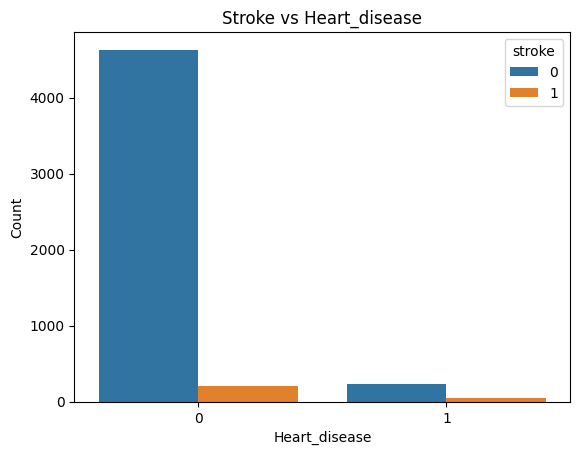

In [183]:
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Stroke vs Heart_disease')
plt.xlabel('Heart_disease')
plt.ylabel('Count')
plt.show()

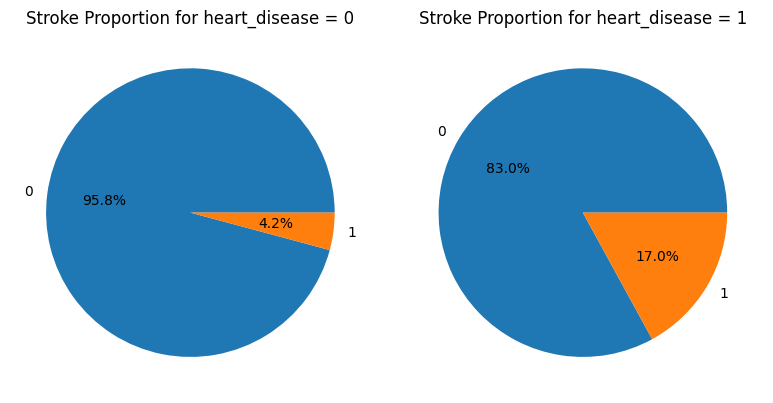

In [184]:
colors = sns.color_palette()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

for heart_disease_status in df['heart_disease'].unique():
    stroke_count = df[df['heart_disease'] == heart_disease_status]['stroke'].value_counts()
    axes[heart_disease_status].pie(stroke_count, labels=stroke_count.index, autopct='%1.1f%%', colors=colors)
    axes[heart_disease_status].set_title(f"Stroke Proportion for heart_disease = {heart_disease_status}")

plt.tight_layout()
plt.show()

### Analysis on stroke and glucose level

In [186]:
stroke_group_avg_glucose_level = df[df['stroke'] == 1]['avg_glucose_level']
non_stroke_group_avg_glucose_level = df[df['stroke'] == 0]['avg_glucose_level']

stroke_stats_avg_glucose_level = stroke_group_avg_glucose_level.describe().rename("Stroke")
non_stroke_stats_avg_glucose_level = non_stroke_group_avg_glucose_level.describe().rename("Non-Stroke")

avg_glucose_level_stats = pd.concat([stroke_stats_avg_glucose_level, non_stroke_stats_avg_glucose_level], axis=1)
print(avg_glucose_level_stats)

           Stroke   Non-Stroke
count  249.000000  4860.000000
mean   132.544739   104.787584
std     61.921056    43.847095
min     56.110000    55.120000
25%     79.790000    77.120000
50%    105.220000    91.465000
75%    196.710000   112.800000
max    271.740000   267.760000


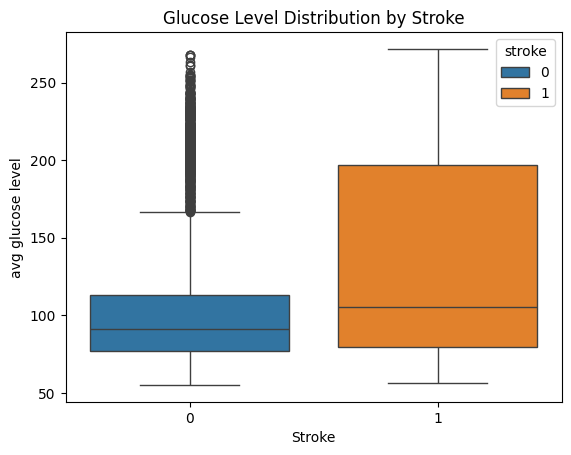

In [187]:
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, hue="stroke")
plt.title('Glucose Level Distribution by Stroke')
plt.xlabel('Stroke')
plt.ylabel('avg glucose level')
plt.show()

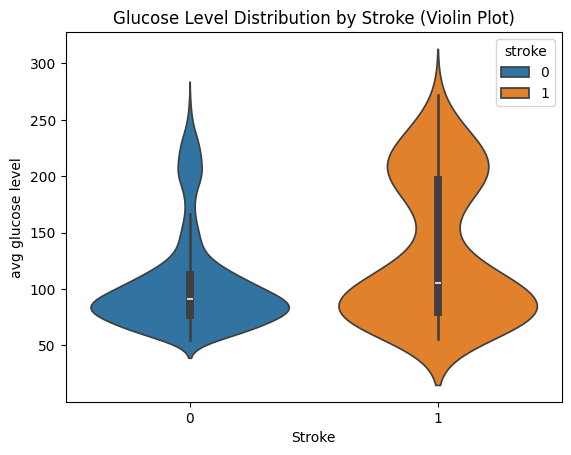

In [188]:
sns.violinplot(x='stroke', y='avg_glucose_level', data=df, hue="stroke")
plt.title('Glucose Level Distribution by Stroke (Violin Plot)')
plt.xlabel('Stroke')
plt.ylabel('avg glucose level')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\3190565479.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('avg_glucose_level_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


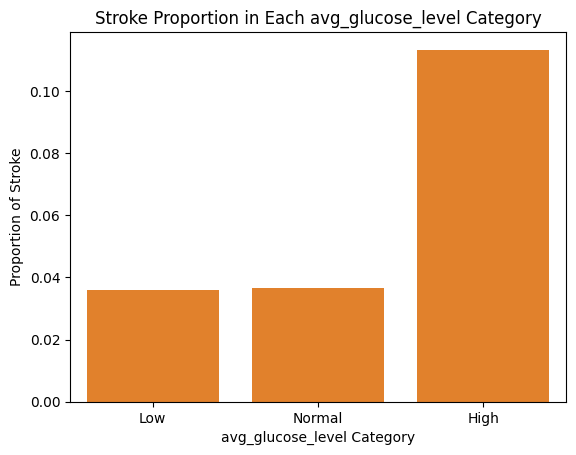

In [190]:
avg_glucose_level_bins = [0, 70, 140, 300]
avg_glucose_level_labels = ['Low', 'Normal', 'High']
avg_glucose_level_category = pd.cut(df['avg_glucose_level'], bins=avg_glucose_level_bins, labels=avg_glucose_level_labels, right=False)

avg_glucose_level_group = pd.DataFrame({
    'stroke': df['stroke'],
    'avg_glucose_level_category': avg_glucose_level_category
}).groupby('avg_glucose_level_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
avg_glucose_level_group['stroke_ratio'] = avg_glucose_level_group[1]

sns.barplot(x=avg_glucose_level_group.index, y=avg_glucose_level_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each avg_glucose_level Category')
plt.xlabel('avg_glucose_level Category')
plt.ylabel('Proportion of Stroke')
plt.show()

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\927794557.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  }).groupby('avg_glucose_level_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)


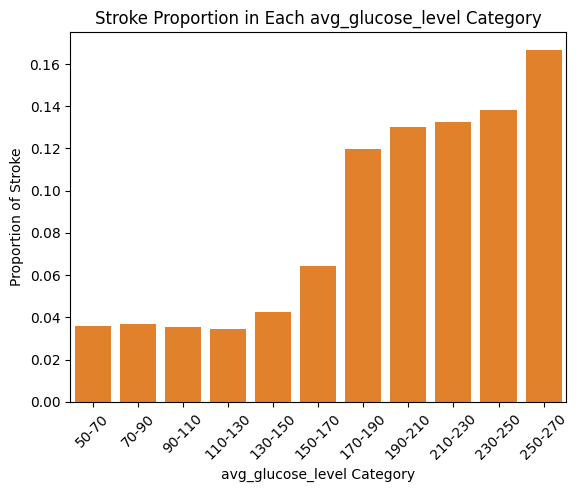

In [193]:
# avg_glucose_level_bins = [50, 100, 150, 200, 250, 280]  # 细分区间
# avg_glucose_level_labels = ['50-100', '100-150', '150-200', '200-250', '250-280']

avg_glucose_level_bins = list(range(50, 281, 20))  # 以 20 为步长细分区间
avg_glucose_level_labels = [f'{i}-{i+20}' for i in avg_glucose_level_bins[:-1]]

avg_glucose_level_category = pd.cut(df['avg_glucose_level'], bins=avg_glucose_level_bins, labels=avg_glucose_level_labels, right=False)

avg_glucose_level_group = pd.DataFrame({
    'stroke': df['stroke'],
    'avg_glucose_level_category': avg_glucose_level_category
}).groupby('avg_glucose_level_category')['stroke'].value_counts(normalize=True).unstack().fillna(0)
avg_glucose_level_group['stroke_ratio'] = avg_glucose_level_group[1]

sns.barplot(x=avg_glucose_level_group.index, y=avg_glucose_level_group['stroke_ratio'], color=sns.color_palette()[1])
plt.title('Stroke Proportion in Each avg_glucose_level Category')
plt.xlabel('avg_glucose_level Category')
plt.ylabel('Proportion of Stroke')
plt.xticks(rotation=45)
plt.show()

In [194]:
t_stat, p_val = ttest_ind(stroke_group_avg_glucose_level.dropna(), non_stroke_group_avg_glucose_level.dropna())
print(f'T-statistic: {t_stat}, p-value: {p_val}')

if p_val < 0.05:
    print("There is a significant difference in avg_glucose_level between the stroke and non-stroke groups.")
else:
    print("There is no significant difference in avg_glucose_level between the stroke and non-stroke groups.")

T-statistic: 9.515777715338581, p-value: 2.705302697167301e-21
There is a significant difference in avg_glucose_level between the stroke and non-stroke groups.


Conclusion: 血糖越高越易中风，尤其是高血糖区间（140以上）中风率显著升高。

### Analysis on stroke and ever_married

In [195]:
stroke_ever_married = df.groupby(['ever_married', 'stroke']).size().unstack().fillna(0)
stroke_ever_married['stroke_ratio'] = stroke_ever_married[1] / (stroke_ever_married[0] + stroke_ever_married[1])
print(stroke_ever_married)

stroke           0    1  stroke_ratio
ever_married                         
No            1727   29      0.016515
Yes           3133  220      0.065613


In [196]:
contingency_table = pd.crosstab(df['stroke'], df['ever_married'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between stroke and ever_married.")
else:
    print("There is no significant relationship between stroke and ever_married.")

Chi2 Statistic: 58.86780922483486
P-value: 1.6862856191673454e-14
There is a significant relationship between stroke and ever_married.


In [198]:
results = pd.DataFrame(columns=["Age Group", "Chi2 Statistic", "P-value", "Conclusion"])

age_bins = [0, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

for age in age_labels:
    subgroup = df[age_group == age]
    contingency_table = pd.crosstab(subgroup['ever_married'], subgroup['stroke'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

    conclusion = "Significant" if p_val < 0.05 else "Not significant"
    
    current_result = pd.DataFrame([{
        "Age Group": age,
        "Chi2 Statistic": chi2_stat,
        "P-value": p_val,
        "Conclusion": conclusion
    }])

    results = pd.concat([results, current_result], ignore_index=True)

results

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\1833721627.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


,Age Group,Chi2 Statistic,P-value,Conclusion
0,<30,0.000000,1.000000,Not significant
1,30-40,0.000000,1.000000,Not significant
2,40-50,0.006072,0.937891,Not significant
3,50-60,0.017867,0.893665,Not significant
4,60-70,2.335314,0.126469,Not significant
5,70-80,3.197506,0.073751,Not significant
6,80-90,0.614737,0.433010,Not significant


Conclusion: 虽然整体上中风和是否结过婚相关性显著（这是反直觉的），但分年龄段检测都不显著，这显然是因为是否结过婚和年龄相关性显著，而对是否中风实际上没有影响。（非常好的结论）

### Analysis on Stroke Patients' Residence Type

In [200]:
stroke_Residence_type = df.groupby(['Residence_type', 'stroke']).size().unstack().fillna(0)
stroke_Residence_type['stroke_ratio'] = stroke_Residence_type[1] / (stroke_Residence_type[0] + stroke_Residence_type[1])
print(stroke_Residence_type)

stroke             0    1  stroke_ratio
Residence_type                         
Rural           2399  114      0.045364
Urban           2461  135      0.052003


In [201]:
contingency_table = pd.crosstab(df['stroke'], df['Residence_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("There is a significant relationship between stroke and Residence_type.")
else:
    print("There is no significant relationship between stroke and Residence_type.")

Chi2 Statistic: 1.0749713079092142
P-value: 0.29982523877153633
There is no significant relationship between stroke and Residence_type.


### Analysis on Stroke Patients' Work Type

In [203]:
df_work = df.groupby(["work_type", "stroke"]).size().unstack(fill_value=0)
df_work.columns = ["No Stroke", "Stroke"]
df_work["Stroke Ratio"] = df_work["Stroke"] / (df_work["Stroke"] + df_work["No Stroke"])
df_work

,No Stroke,Stroke,Stroke Ratio
work_type,,,
Govt_job,624,33,0.050228
Never_worked,22,0,0.000000
Private,2775,149,0.050958
Self-employed,754,65,0.079365
children,685,2,0.002911


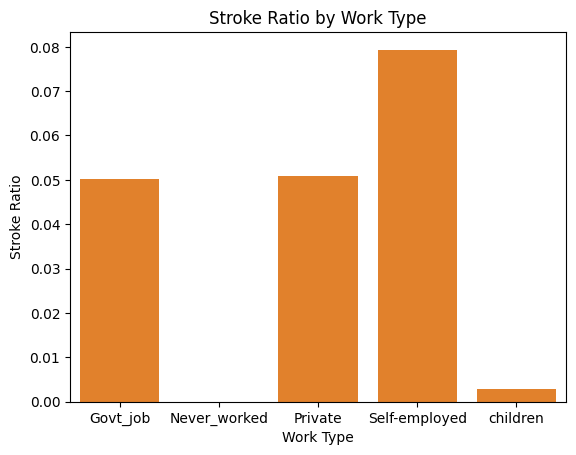

In [204]:
sns.barplot(x=df_work.index, y=df_work['Stroke Ratio'], color=sns.color_palette()[1])
plt.title('Stroke Ratio by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Stroke Ratio')
plt.show()

In [206]:
cross_tab = pd.crosstab(df['work_type'], df['stroke'])
print(cross_tab)

chi2, p, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
    print("There is a significant relationship between work type and stroke.")
else:
    print("There is no significant relationship between work type and stroke.")

stroke            0    1
work_type               
Govt_job        624   33
Never_worked     22    0
Private        2775  149
Self-employed   754   65
children        685    2
Chi2: 49.1591485868476, p-value: 5.40903546949726e-10
There is a significant relationship between work type and stroke.


In [212]:
# 调整 expected 的形状
expected = np.array(expected)
expected_df = pd.DataFrame(expected, index=cross_tab.index, columns=cross_tab.columns)

# 计算标准化残差
observed = cross_tab.values
residuals = (observed - expected_df) / np.sqrt(expected_df)

# 将结果放回DataFrame
residuals_df = pd.DataFrame(residuals, index=cross_tab.index, columns=cross_tab.columns)
print("Standardized Residuals:")
print(residuals_df)

# 判断显著性
threshold = 1.96  # 0.05显著性水平
significant_cells = residuals_df.abs() > threshold

print("\nCells with significant standardized residuals (|residual| > 1.96):")
print(residuals_df[significant_cells])


Standardized Residuals:
stroke                0         1
work_type                        
Govt_job      -0.039179  0.173088
Never_worked   0.234382 -1.035483
Private       -0.123085  0.543781
Self-employed -0.898678  3.970293
children       1.231525 -5.440785

Cells with significant standardized residuals (|residual| > 1.96):
stroke          0         1
work_type                  
Govt_job      NaN       NaN
Never_worked  NaN       NaN
Private       NaN       NaN
Self-employed NaN  3.970293
children      NaN -5.440785


由于卡方检验判断不了是哪个类型造成的显著性，我又用了标准化残差。\
结论：Self-employed中风率高，小孩中风率低，其他（Government, Private, Never worked）无影响。\
很可能是年龄影响，因此做了以下分年龄段分析，结论是不显著：

In [225]:
# 初始化结果DataFrame
results = pd.DataFrame(columns=["Age Group", "Work Type", "Chi2 Statistic", "P-value", "Conclusion"])

# 定义粗略的年龄分组
age_bins = [0, 40, 60, 80, 90]
age_labels = ['<40', '40-60', '60-80', '80+']
age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 获取不同的工作类型
work_types = df['work_type'].unique()

# 遍历每个年龄组
for age in age_labels:
    # 获取当前年龄组的数据
    subgroup = df[age_group == age]
    
    # 遍历每个工作类型
    for work_type in work_types:
        # 获取当前工作类型的子集
        work_subgroup = subgroup[subgroup['work_type'] == work_type]
        
        # 确保子集非空
        if work_subgroup.empty:
            continue
        
        # 创建交叉表，比较工作类型与是否患有中风的关系
        contingency_table = pd.crosstab(work_subgroup['stroke'], work_subgroup['work_type'])
        
        # 进行卡方检验
        chi2_stat, p_val, _, _ = stats.chi2_contingency(contingency_table)
        
        # 根据p值得出结论
        conclusion = "Significant" if p_val < 0.05 else "Not significant"
        
        # 将当前结果添加到结果DataFrame中
        current_result = pd.DataFrame([{
            "Age Group": age,
            "Work Type": work_type,
            "Chi2 Statistic": chi2_stat,
            "P-value": p_val,
            "Conclusion": conclusion
        }])

        results = pd.concat([results, current_result], ignore_index=True)

# 输出结果
print(results)


   Age Group      Work Type  Chi2 Statistic  P-value       Conclusion
0        <40        Private             0.0      1.0  Not significant
1        <40  Self-employed             0.0      1.0  Not significant
2        <40       Govt_job             0.0      1.0  Not significant
3        <40       children             0.0      1.0  Not significant
4        <40   Never_worked             0.0      1.0  Not significant
5      40-60        Private             0.0      1.0  Not significant
6      40-60  Self-employed             0.0      1.0  Not significant
7      40-60       Govt_job             0.0      1.0  Not significant
8      60-80        Private             0.0      1.0  Not significant
9      60-80  Self-employed             0.0      1.0  Not significant
10     60-80       Govt_job             0.0      1.0  Not significant
11       80+        Private             0.0      1.0  Not significant
12       80+  Self-employed             0.0      1.0  Not significant
13       80+       G

C:\Users\KEJIA\AppData\Local\Temp\ipykernel_2852\2556950238.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, current_result], ignore_index=True)


In [223]:
import pandas as pd

# 定义年龄分组
age_bins = [0, 40, 60, 80, 90]
age_labels = ['<40', '40-60', '60-80', '80+']
age_group = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

# 获取不同的工作类型
work_types = df['work_type'].unique()

# 遍历每个年龄组
for age in age_labels:
    # 获取当前年龄组的数据
    subgroup = df[age_group == age]
    
    # 创建一个包含所有工作类型的交叉表
    contingency_table = pd.crosstab(subgroup['stroke'], subgroup['work_type'])
    
    # 输出每个年龄组的交叉表
    print(f"Age: {age}")
    print(contingency_table)
    print("\n")


Age: <40
work_type  Govt_job  Never_worked  Private  Self-employed  children
stroke                                                             
0               157            22     1192            105       685
1                 0             0        4              2         2


Age: 40-60
work_type  Govt_job  Private  Self-employed
stroke                                     
0               296      962            246
1                10       43              7


Age: 60-80
work_type  Govt_job  Private  Self-employed
stroke                                     
0               162      556            331
1                18       81             42


Age: 80+
work_type  Govt_job  Private  Self-employed
stroke                                     
0                 9       65             72
1                 5       21             14




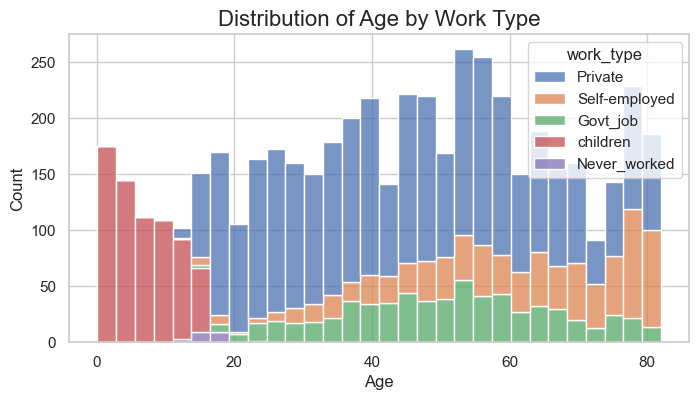

In [230]:
# sns.set(style="whitegrid")

# 创建一个图形
plt.figure(figsize=(8, 4))

# 使用histplot绘制年龄和工作类型的关系
sns.histplot(data=df, x='age', hue='work_type', multiple='stack', bins=30, kde=False)

# 添加标题和标签
plt.title('Distribution of Age by Work Type', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)

# 显示图表
plt.show()

从上图可以清楚地看到，self-employed随着年龄增大而增加，解释了为什么中风和self_employed正相关。18岁以下的children中风率很低也是符合直觉的。

## Model Training and Evaluation